In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija


In [5]:
def load_data():
  train_data = pd.read_csv('../pretprocesiranje/train_data.csv')
  test_data = pd.read_csv('../pretprocesiranje/test_data.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_val = np.array(X_val)
  y_val = np.array(y_val)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_val, y_train, y_val, X_test, y_test

In [ ]:
def create_and_describe(inputs, outputs):
  model = Model(inputs=inputs, outputs=outputs)

  # ovi parametri ostaju isti
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
  )

  model.summary()

  return model

In [ ]:
def model_fit(X_train, y_train, X_test, y_test, batch_size, epochs):

  if isinstance(batch_size, int):
        batch_size = [batch_size] 

  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  for batch in batch_size:
    history = model.fit(
      X_train,
      y_train,
      batch_size=batch,
      epochs=epochs,
      validation_data=(X_val, y_val),
  )
    losses.append(history.history['loss'])
    accuracies.append(history.history['accuracy'])
    val_losses.append(history.history['val_loss'])
    val_accuracies.append(history.history['val_accuracy'])

  return losses, accuracies, val_losses, val_accuracies

In [ ]:
def plot_metrics(losses, accuracies, val_losses, val_accuracies):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  #losses
  ax1.plot(losses[0], label='Training Loss')
  ax1.plot(val_losses[0], label='Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  #accuracies
  ax2.plot(accuracies[0], label='Training Accuracy')
  ax2.plot(val_accuracies[0], label='Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  plt.tight_layout()
  plt.show()

In [6]:
X_train, X_val, y_train, y_val, X_test, y_test = load_data()

In [ ]:
compare_loss = []
compare_val_loss = []
compare_accuracy = []
compare_val_accuracy = []

#**Multilayer Perceptron**

#BaselineModel

Model: "model_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


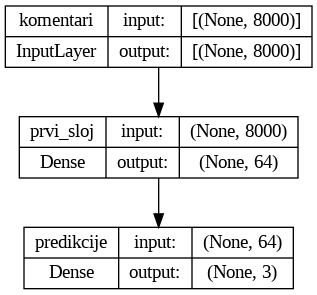

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

model = create_and_describe(inputs=inputs, outputs=outputs)
plot_model(model,show_shapes=True)

In [ ]:
batch_size = [32, 64, 128]
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=10)

Epoch 1/10
213/213 [==============================] - 3s 9ms/step - loss: 0.9859 - accuracy: 0.5338 - val_loss: 0.8073 - val_accuracy: 0.7065
Epoch 2/10
213/213 [==============================] - 2s 9ms/step - loss: 0.6092 - accuracy: 0.7903 - val_loss: 0.6382 - val_accuracy: 0.7225
Epoch 3/10
213/213 [==============================] - 3s 12ms/step - loss: 0.3919 - accuracy: 0.8621 - val_loss: 0.6365 - val_accuracy: 0.7189
Epoch 4/10
213/213 [==============================] - 2s 10ms/step - loss: 0.2907 - accuracy: 0.8927 - val_loss: 0.6678 - val_accuracy: 0.7101
Epoch 5/10
213/213 [==============================] - 2s 8ms/step - loss: 0.2342 - accuracy: 0.9138 - val_loss: 0.7122 - val_accuracy: 0.7089
Epoch 6/10
213/213 [==============================] - 2s 8ms/step - loss: 0.1992 - accuracy: 0.9225 - val_loss: 0.7634 - val_accuracy: 0.7054
Epoch 7/10
213/213 [==============================] - 2s 9ms/step - loss: 0.1769 - accuracy: 0.9285 - val_loss: 0.8151 - val_accuracy: 0.7024
Epoc

In [ ]:
batch_sizes = [32,64,128]

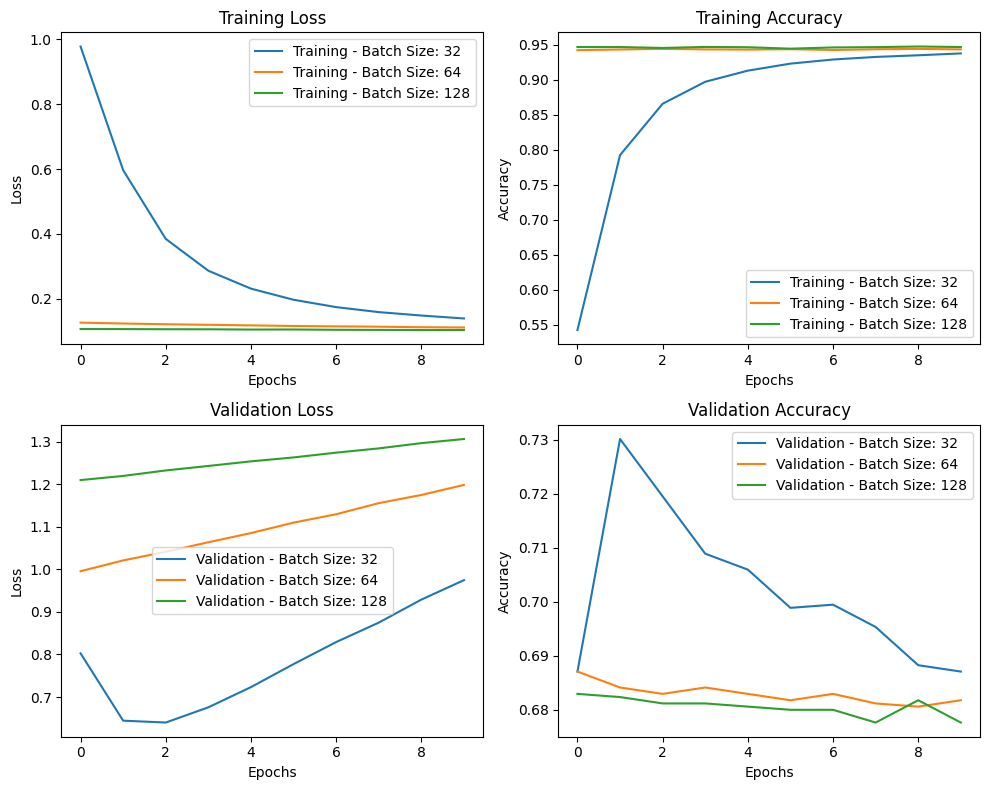

In [ ]:
plt.figure(figsize=(10, 8))

# training loss
plt.subplot(2, 2, 1)
for i in range(len(batch_sizes)):
    plt.plot(losses[i], label=f'Training - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# training accuracy
plt.subplot(2, 2, 2)
for i in range(len(batch_sizes)):
    plt.plot(accuracies[i], label=f'Training - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# validation loss
plt.subplot(2, 2, 3)
for i in range(len(batch_sizes)):
    plt.plot(val_losses[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

# validation accuracy
plt.subplot(2, 2, 4)
for i in range(len(batch_sizes)):
    plt.plot(val_accuracies[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


overfiting u sva 3 slucaja lmao, u proseku mozda najbolje za batch=64

In [ ]:
compare_loss.append(losses[1][-1])
compare_val_loss.append(val_losses[1][-1])
compare_accuracy.append(accuracies[1][-1])
compare_val_accuracy.append(val_accuracies[1][-1])

#Deep network

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10)

Epoch 1/10
107/107 [==============================] - 3s 17ms/step - loss: 1.0039 - accuracy: 0.4699 - val_loss: 0.7946 - val_accuracy: 0.6877
Epoch 2/10
107/107 [==============================] - 2s 19ms/step - loss: 0.5262 - accuracy: 0.8004 - val_loss: 0.6690 - val_accuracy: 0.7130
Epoch 3/10
107/107 [==============================] - 2s 16ms/step - loss: 0.2790 - accuracy: 0.8842 - val_loss: 0.7726 - val_accuracy: 0.7077
Epoch 4/10
107/107 [==============================] - 1s 12ms/step - loss: 0.2003 - accuracy: 0.9170 - val_loss: 0.8706 - val_accuracy: 0.7018
Epoch 5/10
107/107 [==============================] - 1s 12ms/step - loss: 0.1638 - accuracy: 0.9241 - val_loss: 0.9567 - val_accuracy: 0.6989
Epoch 6/10
107/107 [==============================] - 1s 11ms/step - loss: 0.1418 - accuracy: 0.9344 - val_loss: 1.0348 - val_accuracy: 0.6953
Epoch 7/10
107/107 [==============================] - 1s 12ms/step - loss: 0.1292 - accuracy: 0.9384 - val_loss: 1.1193 - val_accuracy: 0.6918

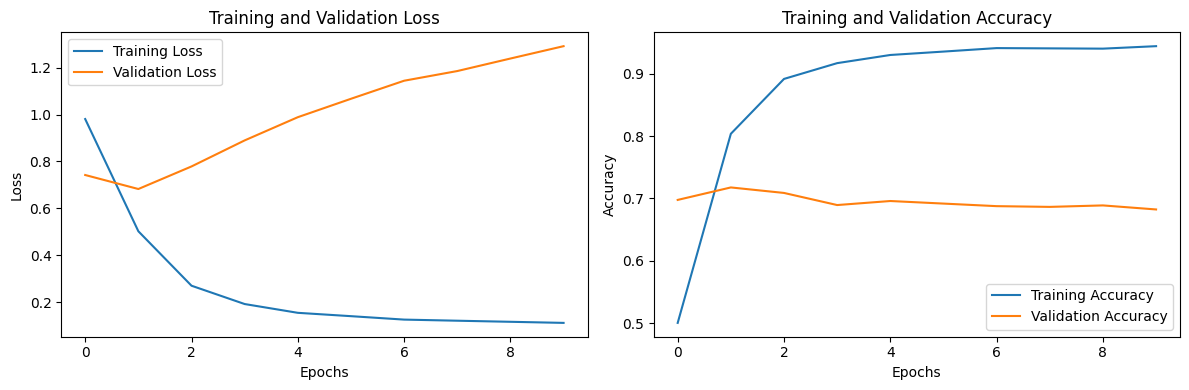

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

i dalje prelose al smirio se val

In [ ]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#L2 regularizacija

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.03))(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10)

Epoch 1/10
107/107 [==============================] - 4s 22ms/step - loss: 1.3696 - accuracy: 0.4065 - val_loss: 1.0798 - val_accuracy: 0.4184
Epoch 2/10
107/107 [==============================] - 1s 13ms/step - loss: 1.0834 - accuracy: 0.4750 - val_loss: 1.0889 - val_accuracy: 0.5480
Epoch 3/10
107/107 [==============================] - 1s 12ms/step - loss: 1.0890 - accuracy: 0.5615 - val_loss: 1.1148 - val_accuracy: 0.5604
Epoch 4/10
107/107 [==============================] - 1s 12ms/step - loss: 1.0260 - accuracy: 0.6389 - val_loss: 1.0481 - val_accuracy: 0.6741
Epoch 5/10
107/107 [==============================] - 1s 12ms/step - loss: 0.9196 - accuracy: 0.7287 - val_loss: 1.0341 - val_accuracy: 0.6924
Epoch 6/10
107/107 [==============================] - 1s 12ms/step - loss: 0.8645 - accuracy: 0.7676 - val_loss: 1.0448 - val_accuracy: 0.6900
Epoch 7/10
107/107 [==============================] - 1s 12ms/step - loss: 0.8024 - accuracy: 0.7890 - val_loss: 1.0514 - val_accuracy: 0.6918

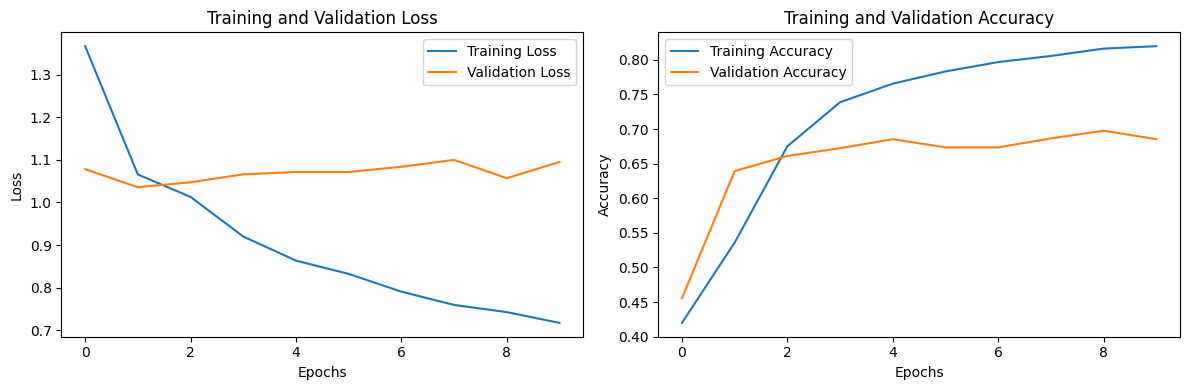

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

malo se stabilizovao



In [ ]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#Dropout i batch normalization regularizacija

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5, name="dropout1")(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dropout(0.5, name="dropout2")(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu', name="reci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 dropout1 (Dropout)          (None, 32)                0         
                                                                 
 batch_normalization_69 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 drugi_sloj (Dense)          (None, 32)                1056      
                                                                 
 dropout2 (Dropout)          (None, 32)                0         
                                                         

In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10)

Epoch 1/10
107/107 [==============================] - 3s 12ms/step - loss: 1.1665 - accuracy: 0.3822 - val_loss: 1.0865 - val_accuracy: 0.4184
Epoch 2/10
107/107 [==============================] - 1s 8ms/step - loss: 1.0657 - accuracy: 0.4310 - val_loss: 1.0798 - val_accuracy: 0.4184
Epoch 3/10
107/107 [==============================] - 1s 8ms/step - loss: 0.9877 - accuracy: 0.5024 - val_loss: 1.0673 - val_accuracy: 0.5197
Epoch 4/10
107/107 [==============================] - 1s 9ms/step - loss: 0.8660 - accuracy: 0.6007 - val_loss: 0.9936 - val_accuracy: 0.5292
Epoch 5/10
107/107 [==============================] - 1s 9ms/step - loss: 0.7365 - accuracy: 0.6778 - val_loss: 0.8938 - val_accuracy: 0.5657
Epoch 6/10
107/107 [==============================] - 1s 8ms/step - loss: 0.6465 - accuracy: 0.7274 - val_loss: 0.7698 - val_accuracy: 0.6517
Epoch 7/10
107/107 [==============================] - 1s 8ms/step - loss: 0.5708 - accuracy: 0.7735 - val_loss: 0.7385 - val_accuracy: 0.6788
Epoch

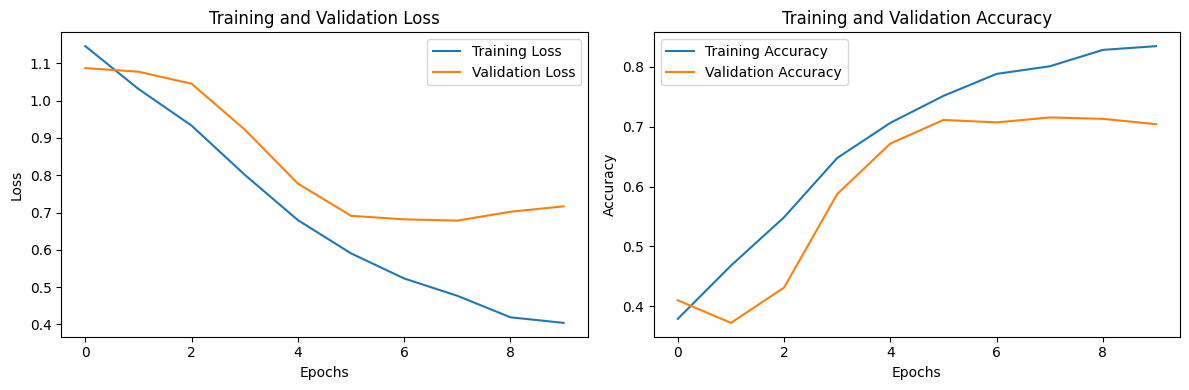

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#all 3 :) 

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.03))(inputs)
x = Dropout(0.5, name="dropout1")(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dropout(0.5, name="dropout2")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 dropout1 (Dropout)          (None, 32)                0         
                                                                 
 batch_normalization_71 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 drugi_sloj (Dense)          (None, 32)                1056      
                                                                 
 dropout2 (Dropout)          (None, 32)                0         
                                                         

In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10)

Epoch 1/10
107/107 [==============================] - 3s 16ms/step - loss: 1.2934 - accuracy: 0.4372 - val_loss: 1.1977 - val_accuracy: 0.4184
Epoch 2/10
107/107 [==============================] - 1s 10ms/step - loss: 1.0487 - accuracy: 0.5902 - val_loss: 1.2070 - val_accuracy: 0.5445
Epoch 3/10
107/107 [==============================] - 1s 8ms/step - loss: 0.9902 - accuracy: 0.6801 - val_loss: 1.1870 - val_accuracy: 0.5940
Epoch 4/10
107/107 [==============================] - 1s 8ms/step - loss: 0.9472 - accuracy: 0.7205 - val_loss: 1.1167 - val_accuracy: 0.6788
Epoch 5/10
107/107 [==============================] - 1s 8ms/step - loss: 0.9476 - accuracy: 0.7394 - val_loss: 1.0675 - val_accuracy: 0.7006
Epoch 6/10
107/107 [==============================] - 1s 8ms/step - loss: 0.9262 - accuracy: 0.7592 - val_loss: 1.0499 - val_accuracy: 0.6912
Epoch 7/10
107/107 [==============================] - 1s 8ms/step - loss: 0.8995 - accuracy: 0.7703 - val_loss: 1.0598 - val_accuracy: 0.6983
Epoc

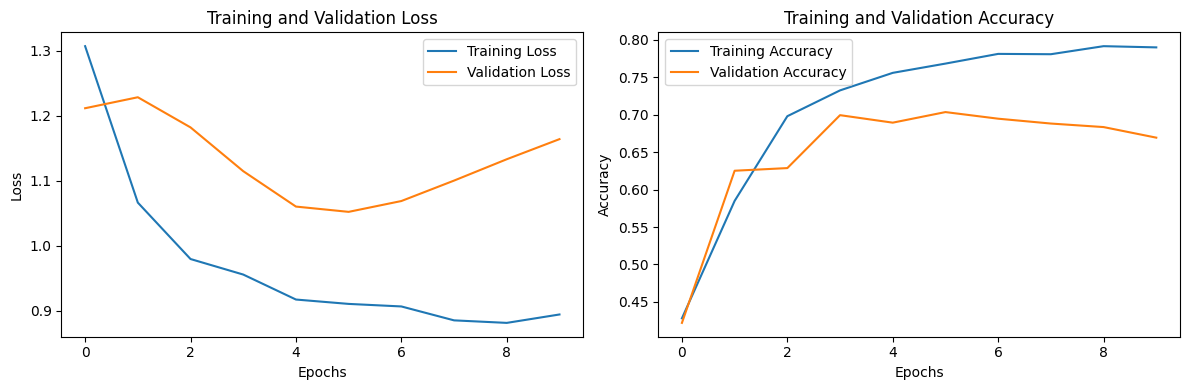

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

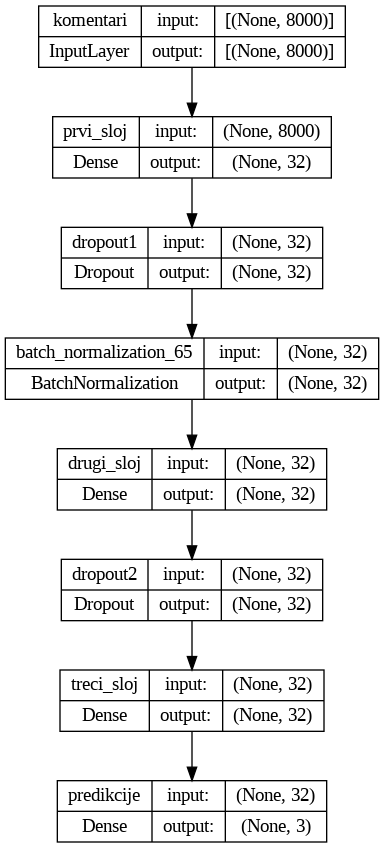

In [ ]:
plot_model(model,show_shapes=True)

<Figure size 500x500 with 0 Axes>

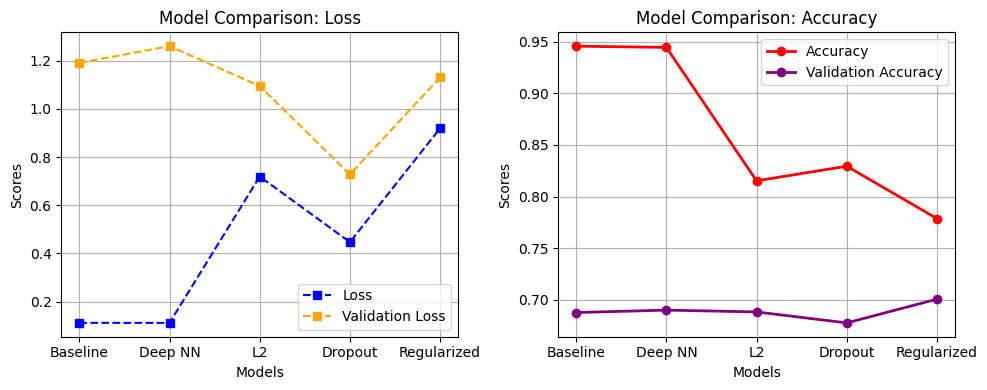

In [ ]:
model_names = ['Baseline', 'Deep NN', 'L2', 'Dropout', 'Regularized']
plt.figure(figsize=(5, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(model_names, compare_loss, marker='s', linestyle='--', color='blue', label='Loss')
ax1.plot(model_names, compare_val_loss, marker='s', linestyle='--', color='orange', label='Validation Loss')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison: Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(model_names, compare_accuracy, marker='o', linestyle='-', linewidth=2, color='red', label='Accuracy')
ax2.plot(model_names, compare_val_accuracy, marker='o', linestyle='-', linewidth=2, color='purple', label='Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Comparison: Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()

#Test skup

In [ ]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

50/50 - 0s - loss: 0.9254 - accuracy: 0.7989 - 126ms/epoch - 3ms/step
Test loss: 0.9254002571105957
Test accuracy: 0.7988650798797607
